<a href="https://colab.research.google.com/github/asu-trans-ai-lab/OSM2GMNS/blob/master/osm2gmns_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __OSM2GMNS Quickstart Notebook__

OSM2GMNS is a Python package that helps generate high-fidelity mesoscopic transportation network models from OpenStreetMap data. This enables even the smallest transportation authorities to begin analysis with a high quality network model for future analysis. 


# 1. Data Collection
We rely on a few open-source projects to gather the raw data to start our analysis. Export data from your area of interest from the following sources.
 * __OpenStreetMap base map__: https://www.openstreetmap.org/export
   * __Geofabrik__: Alternative for non-rectangular Areas of Interest: http://download.geofabrik.de/
 * __Bike Transport Info__ (Optional):  https://extract.bbbike.org

For this demonstration, we'll use sample data from the ASU Transit AI Lab Github

osm2gmns also enables users to download OSM data within the region of interest using a built-in function. A region can be a state, city, or even university. On OpenStreetMap homepage, search the region name to get its unique relation id. The following example shows how to download Tempe city OSM data using function downloadOSMData.

https://www.openstreetmap.org/#map=18/33.42141/-111.93472&layers=DG 

# 2. Install the osm2gmns package

In [1]:
!pip install osm2gmns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 3.0 MB/s 
     |████████████████████████████████| 1.3 MB 8.9 MB/s 


# 3. Create a network model from OpenStreetMap exports

In [2]:
# Import osm2gmns with the alias as "og" (easier to type)
import osm2gmns as og
# relation id for City of Tempe is 110833.
og.downloadOSMData(110833, 'map.osm')
# Generate a net from the Tempe, AZ OpenStreetMap export and include Points of Interest (POI=True)


osm2gmns, 0.7.0
valid reponses got from API server.
receving data...
map data has been written to map.osm


arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: all
  POI: False
  POI_sampling_ratio: 1.0
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
  number of nodes: 7553, number of links: 16455, number of pois: 0


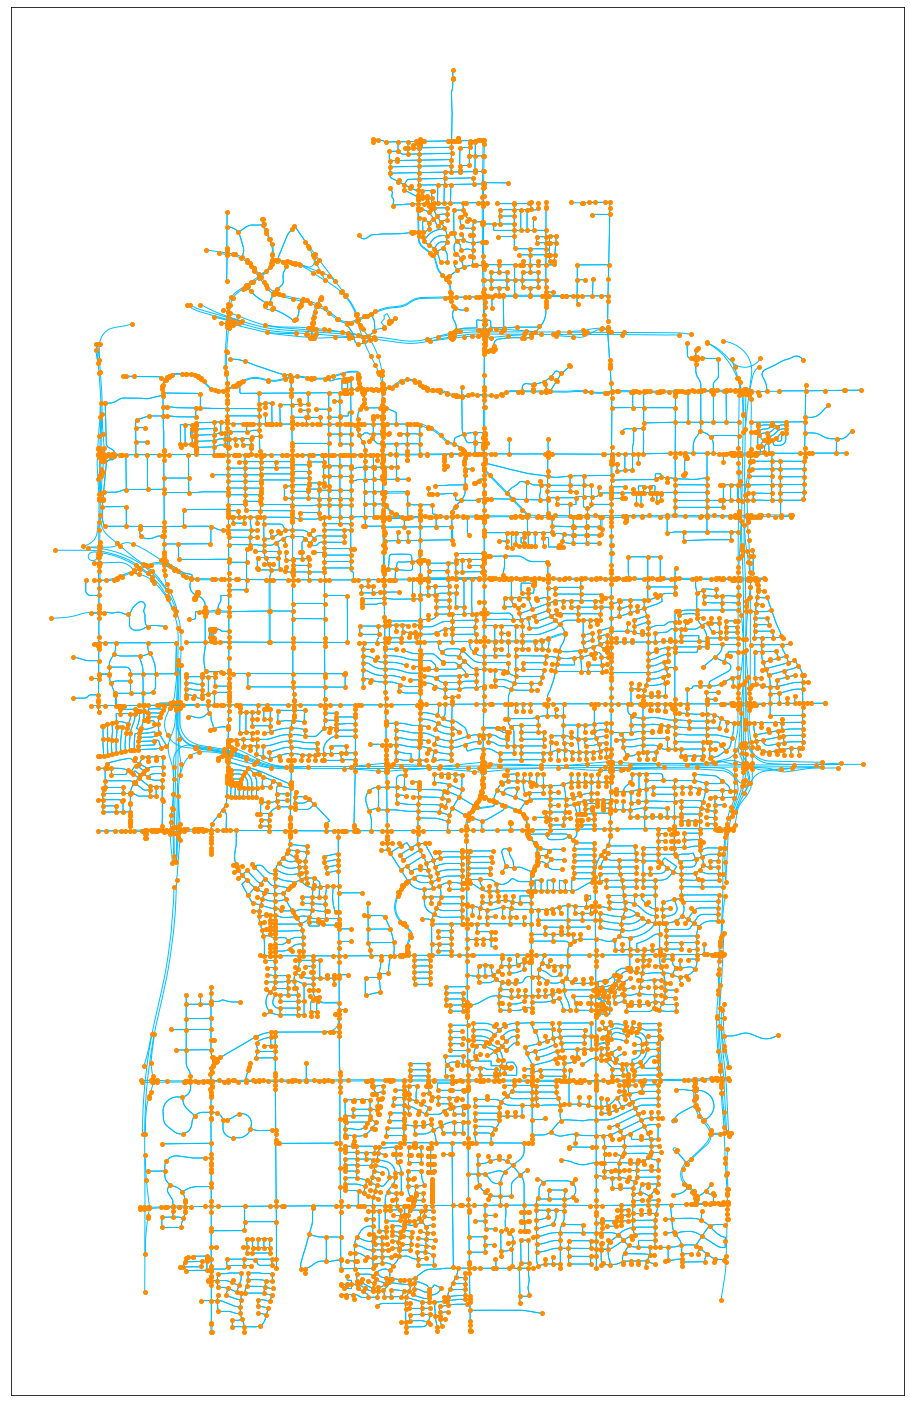

In [3]:
input_file = 'map.osm'
net = og.getNetFromFile(input_file) 

# Use og.show(net) to visualize the network model
og.show(net)

#4. Modify the network model 

## Example: Consolidate Complex Intersections 
Intersections can have lots of nodes representing different turn lanes, crosswalks, etc. 

Using og.consolidateComplexIntersections(net), we can combine nodes in intersections into a single node to make analysis faster and simpler

Consolidating Complex Intersections
    0 intersections have been consolidated


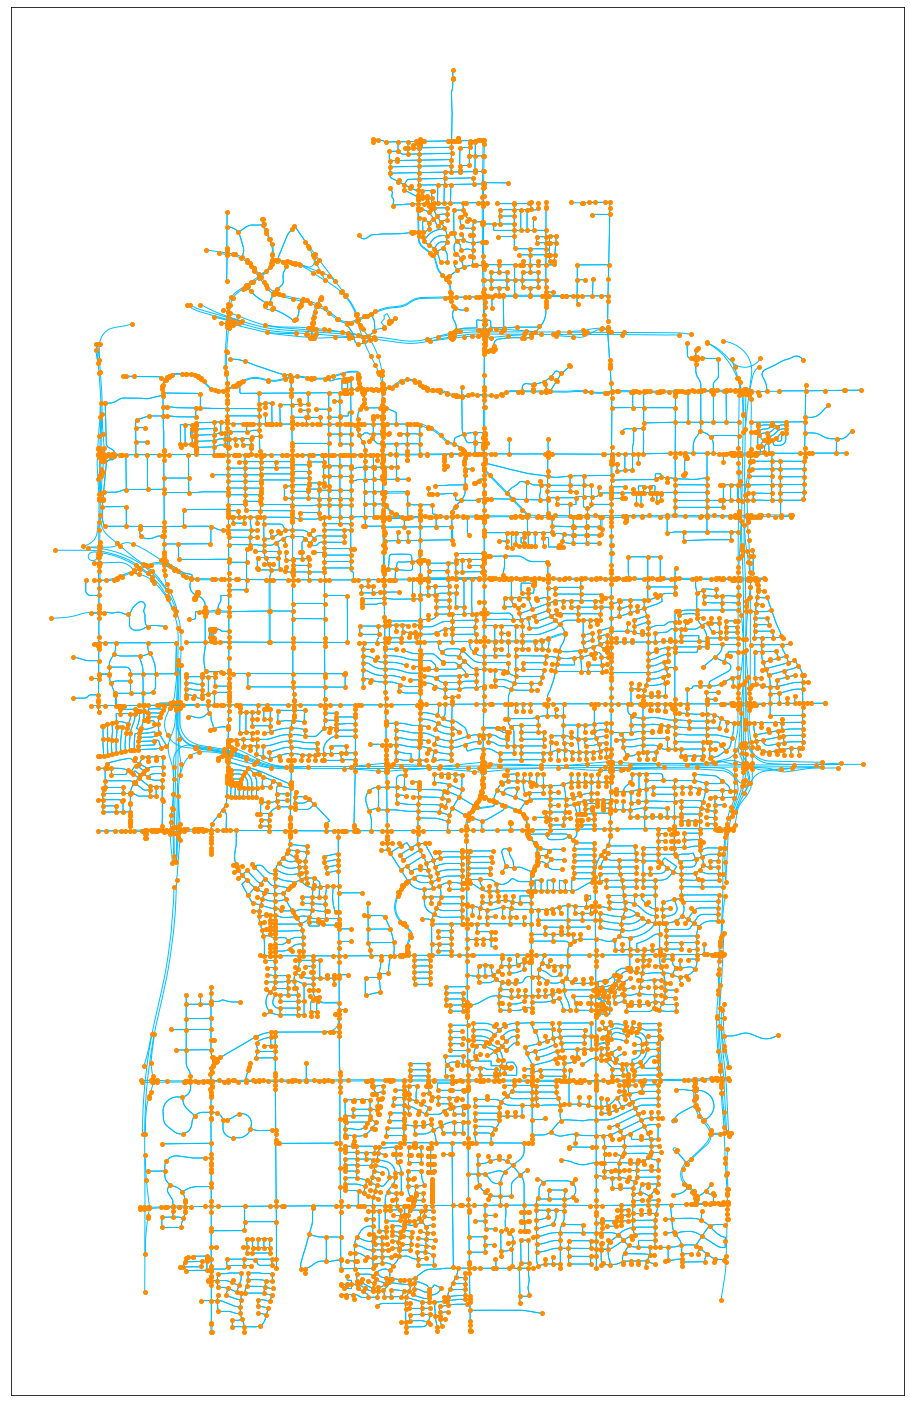

In [4]:
og.consolidateComplexIntersections(net)
og.show(net)

## Example: Points of Interest

We can connect Points of Interest (POIs) to the network model. Nodes representing the center (centroids) of POIs are generated. These nodes are connected with a link to the nearest node on the rest of the network

arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: all
  POI: True
  POI_sampling_ratio: 1.0
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
    generating POIs
  number of nodes: 7553, number of links: 16455, number of pois: 46099


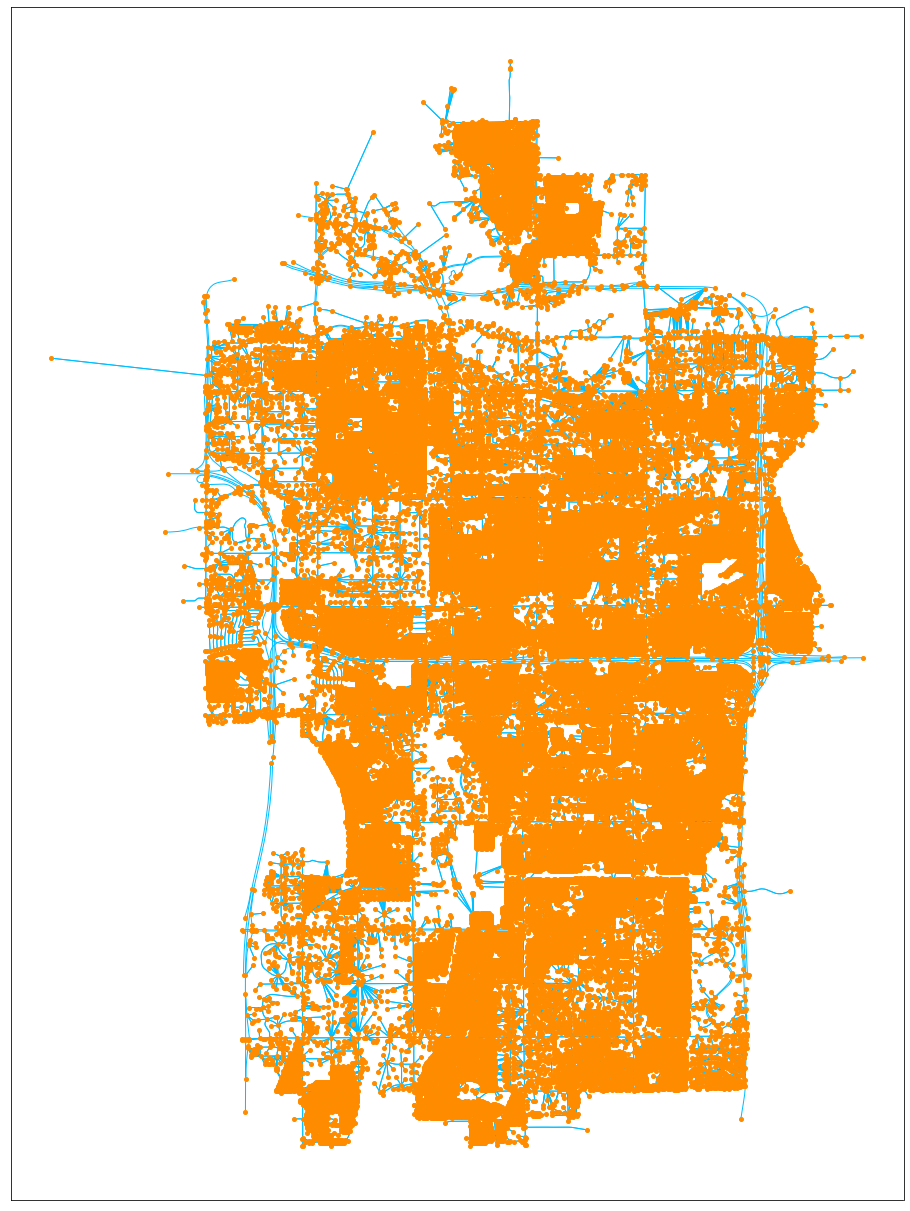

In [5]:
net = og.getNetFromFile('map.osm', POI=True)
og.connectPOIWithNet(net)
og.show(net)

Consolidating Complex Intersections
    0 intersections have been consolidated


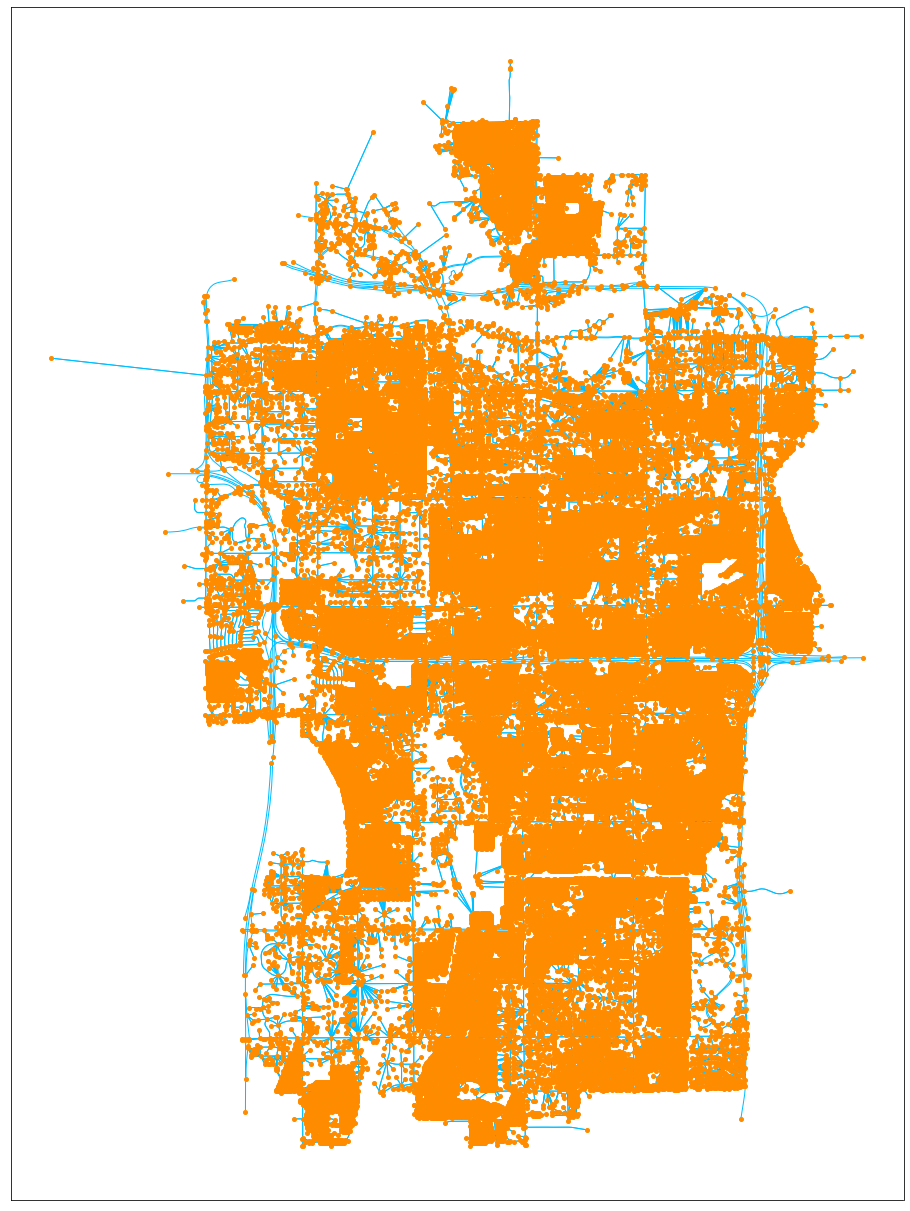

In [ ]:
og.consolidateComplexIntersections(net)
og.show(net)

#5. Export transportation network model

We can export our transportation network model to a CSV format for ease of use in further analysis with other systems. 

og.outputNetToCSV(...) will generate two files: node.csv representing nodes, and link.csv representing links (edges) between nodes.

In [6]:

og.outputNetToCSV(net)

Outputting Network Files


In [7]:
"""
Take a peek at the format of the CSVs using the Pandas library
Loading the CSV files gives us a DataFrame object which is very heavily used in 
data science and analysis. 

For more information on how this data is organized, check out the GMNS specification

https://github.com/zephyr-data-specs/GMNS/pull/54

"""

import pandas as pd

node_dataframe = pd.read_csv("node.csv")
node_dataframe.head()

,name,node_id,osm_node_id,osm_highway,zone_id,ctrl_type,node_type,activity_type,is_boundary,x_coord,y_coord,intersection_id,poi_id,notes
0,NaN,0,41190566.0,NaN,NaN,NaN,NaN,NaN,NaN,-111.976541,33.387129,NaN,NaN,NaN
1,NaN,1,41190568.0,NaN,NaN,NaN,NaN,NaN,NaN,-111.976576,33.388799,NaN,NaN,NaN
2,NaN,2,41190571.0,NaN,NaN,NaN,NaN,NaN,NaN,-111.976533,33.390691,NaN,NaN,NaN
3,NaN,3,41190577.0,NaN,NaN,NaN,NaN,NaN,NaN,-111.955724,33.325899,NaN,NaN,NaN
4,NaN,4,41190578.0,NaN,NaN,NaN,NaN,NaN,NaN,-111.955887,33.325181,NaN,NaN,NaN


In [8]:
link_dataframe = pd.read_csv("link.csv")
link_dataframe.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,name,link_id,osm_way_id,from_node_id,to_node_id,dir_flag,length,lanes,free_speed,capacity,link_type_name,link_type,geometry,allowed_uses,from_biway,is_link,VDF_fftt1,VDF_cap1
0,South Apalosa Drive,0,5560498.0,0,1,1,185.39,NaN,NaN,NaN,residential,6,"LINESTRING (-111.9765412 33.3871290, -111.9766...",auto,1,0,NaN,NaN
1,South Apalosa Drive,1,5560498.0,1,0,1,185.39,NaN,NaN,NaN,residential,6,"LINESTRING (-111.9765756 33.3887988, -111.9766...",auto,1,0,NaN,NaN
2,South Apalosa Drive,2,5560498.0,1,2,1,210.34,NaN,NaN,NaN,residential,6,"LINESTRING (-111.9765756 33.3887988, -111.9764...",auto,1,0,NaN,NaN
3,South Apalosa Drive,3,5560498.0,2,1,1,210.34,NaN,NaN,NaN,residential,6,"LINESTRING (-111.9765326 33.3906908, -111.9764...",auto,1,0,NaN,NaN
4,South Westfall Avenue,4,5560500.0,3,4,1,80.94,NaN,NaN,NaN,residential,6,"LINESTRING (-111.9557238 33.3258985, -111.9558...",auto,1,0,NaN,NaN


In [9]:
link_dataframe = pd.read_csv("poi.csv")
link_dataframe.head()

,name,poi_id,osm_way_id,osm_relation_id,building,amenity,leisure,way,geometry,centroid,area,area_ft2
0,Goodwin,0,28711662.0,NaN,NaN,NaN,park,NaN,"POLYGON ((-111.9088349 33.3297103, -111.90838 ...",POINT (-111.9081107 33.3293377),29762.0,320355.6
1,Circle G Ranch Park,1,28711926.0,NaN,NaN,NaN,park,NaN,"POLYGON ((-111.8999234 33.3307112, -111.899744...",POINT (-111.8983451 33.330601),18790.5,202259.5
2,Discount Tire,2,28712035.0,NaN,yes,NaN,NaN,NaN,"POLYGON ((-111.91037 33.3334211, -111.91037 33...",POINT (-111.9106097 33.3333523),770.6,8294.5
3,Walgreens,3,28712045.0,NaN,yes,NaN,NaN,NaN,"POLYGON ((-111.910102 33.3342406, -111.9100982...",POINT (-111.9098569 33.3340762),1511.5,16269.7
4,NaN,4,28712116.0,NaN,yes,NaN,NaN,NaN,"POLYGON ((-111.8996807 33.3345233, -111.899674...",POINT (-111.8993523 33.3343434),2594.5,27926.8


#6. Basic analysis with Pandas

The node and link files are in CSV format, which can be used with a wide variety of programming languages, such as R, and programs, such as Excel.

Here, we show a quick demonstration of some simple analysis using Python

In [10]:
# From the previous cells, we have pandas DataFrame objects representing the node and link data for our model
print(node_dataframe.head(), link_dataframe.head())

  name  node_id  osm_node_id osm_highway  zone_id ctrl_type  node_type  \
0  NaN        0   41190566.0         NaN      NaN       NaN        NaN   
1  NaN        1   41190568.0         NaN      NaN       NaN        NaN   
2  NaN        2   41190571.0         NaN      NaN       NaN        NaN   
3  NaN        3   41190577.0         NaN      NaN       NaN        NaN   
4  NaN        4   41190578.0         NaN      NaN       NaN        NaN   

   activity_type  is_boundary     x_coord    y_coord  intersection_id  poi_id  \
0            NaN          NaN -111.976541  33.387129              NaN     NaN   
1            NaN          NaN -111.976576  33.388799              NaN     NaN   
2            NaN          NaN -111.976533  33.390691              NaN     NaN   
3            NaN          NaN -111.955724  33.325899              NaN     NaN   
4            NaN          NaN -111.955887  33.325181              NaN     NaN   

   notes  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN     